In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pickle
from datetime import datetime
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.model import *
from scripts.logger import setup_logger

In [5]:
train_data = pd.read_csv('../data/train_cleaned.csv', low_memory=False)
test_data = pd.read_csv('../data/test_cleaned.csv', low_memory=False)
store_data = pd.read_csv('../data/store.csv', low_memory=False)

In [6]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [7]:
# change date type from object to datetime type
train_data.Date = pd.to_datetime(train_data["Date"])
test_data.Date=pd.to_datetime(test_data["Date"])
test_data = pd.merge(test_data, store_data, how= 'inner', on='Store')

In [8]:
test_data['Promo2SinceWeek'] = test_data['Promo2SinceWeek'].fillna(0)
test_data['Promo2SinceYear'] = test_data['Promo2SinceYear'].fillna(0)
test_data['PromoInterval'] = test_data['PromoInterval'].fillna(0)

In [9]:
test_data['CompetitionOpenSinceYear'] = test_data['CompetitionOpenSinceYear'].fillna(0)
test_data['CompetitionOpenSinceMonth'] = test_data['CompetitionOpenSinceMonth'].fillna(0)

In [10]:
median_distance = test_data['CompetitionDistance'].median()
test_data['CompetitionDistance'] = test_data['CompetitionDistance'].fillna(median_distance)

In [11]:
extract_date_features(train_data)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,a,1,a,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0,1,1,Winter
1017205,1112,1,2013-01-01,0,0,0,0,a,1,c,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017206,1113,1,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017207,1114,1,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,2013,1,1,0,1,1,Winter


In [12]:
extract_date_features(test_data)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,1,3,2015-09-17,1.0,1,0,0,c,a,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
1,2,3,3,2015-09-17,1.0,1,0,0,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,0,17,38,Summer
2,3,7,3,2015-09-17,1.0,1,0,0,a,c,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
3,4,8,3,2015-09-17,1.0,1,0,0,a,a,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
4,5,9,3,2015-09-17,1.0,1,0,0,a,c,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,5,2015-08-01,1.0,0,0,0,a,a,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,1,1,31,Summer
41084,41085,1112,5,2015-08-01,1.0,0,0,0,c,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer
41085,41086,1113,5,2015-08-01,1.0,0,0,0,a,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer
41086,41087,1114,5,2015-08-01,1.0,0,0,0,a,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer


In [13]:
# save the preprocessed data's
train_data.to_csv('../data/train_processed.csv', index=False)
test_data.to_csv('../data/test_processed.csv', index=False)

In [14]:
# Create and fit the preprocessing pipeline
preprocessor = create_preprocessing_pipeline()
X_train = train_data.drop(['Sales', 'Customers', 'Date'], axis=1)

In [15]:
X_train

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,4,1,1,0,1,c,a,1270.0,9.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
1,2,4,1,1,0,1,a,a,570.0,11.0,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
2,3,4,1,1,0,1,a,a,14130.0,12.0,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
3,4,4,1,1,0,1,c,c,620.0,9.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
4,5,4,1,1,0,1,a,a,29910.0,4.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,0,0,a,1,a,a,1900.0,6.0,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0,1,1,Winter
1017205,1112,1,0,0,a,1,c,c,1880.0,4.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017206,1113,1,0,0,a,1,a,c,9260.0,0.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017207,1114,1,0,0,a,1,a,c,870.0,0.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter


In [16]:
X_test = test_data.drop(['Id', 'Date'], axis=1)

In [17]:
preprocessor.fit(train_data)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Store', 'DayOfWeek', 'DayOfMonth',
                                  'WeekOfYear', 'Year', 'Month',
                                  'CompetitionDistance',
                                  'CompetitionOpenSinceMonth',
                                  'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                                  'Promo2SinceYear']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['StoreType', 'Assortment', 'StateHoliday',
                                  'SchoolHoliday', 'Season', 'Promo',
                                  'Promo2'])])

In [18]:
X_train_processed = preprocessor.transform(train_data)
print(X_train_processed)

[[-1.73164032  0.50148416  1.74076566 ...  1.          1.
   0.        ]
 [-1.72853385  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 [-1.72542738  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 ...
 [ 1.72275751 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72586398 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72897045 -1.00047591 -1.67312281 ...  0.          0.
   1.        ]]


In [19]:
X_test_processed = preprocessor.transform(test_data)
print(X_test_processed)

[[-1.73164032e+00  8.30805534e-04  1.47617711e-01 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [-1.72542738e+00  8.30805534e-04  1.47617711e-01 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.71300149e+00  8.30805534e-04  1.47617711e-01 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 1.72275751e+00  1.00213752e+00 -1.67312281e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 1.72586398e+00  1.00213752e+00 -1.67312281e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 1.72897045e+00  1.00213752e+00 -1.67312281e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [20]:
y_train = train_data['Sales']
joblib.dump(X_train_processed, 'X_train_processed.joblib')
joblib.dump(X_test_processed, 'X_test_processed.joblib')
joblib.dump(y_train, 'y_train.joblib')

['y_train.joblib']

In [21]:
# Assign the preprocessed data
X_train, X_test, y_train = X_train_processed,X_test_processed,y_train

# Split the training data further for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the model
model = build_model()

# Train the model with training data
trained_model = train_model(model, X_train, y_train)

In [22]:
# Evaluate the model
mse, mae, rmse, r2, msle = evaluate_model(trained_model, X_val, y_val)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MSLE: {msle}")

MSE: 823698.0139255588
MAE: 510.6021401312579
RMSE: 907.5781034850713
R2: 0.9443025649721308
MSLE: 0.27115472078233194


In [23]:
# Use the custom loss function in your pipeline or model evaluation
huber_model = HuberRegressor(max_iter=1000)  # You can adjust the number as needed

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(huber_model, X_train, y_train, scoring=make_scorer(mean_squared_error))

array([8797288.19273149, 8862728.87929984, 8635559.95683173,
       8842800.93384614, 8863516.80330765])

In [24]:
# Assuming you have trained your model and created your preprocessor pipeline
feature_importance = get_feature_importance(trained_model, preprocessor)

# Display the top 10 important features
print(feature_importance.head(10))

                      feature  importance
1                   DayOfWeek    0.389526
6         CompetitionDistance    0.110915
18             StateHoliday_0    0.090211
0                       Store    0.088667
8    CompetitionOpenSinceYear    0.043173
29                    Promo_1    0.038554
28                    Promo_0    0.037806
7   CompetitionOpenSinceMonth    0.034302
12                StoreType_b    0.033548
10            Promo2SinceYear    0.021597


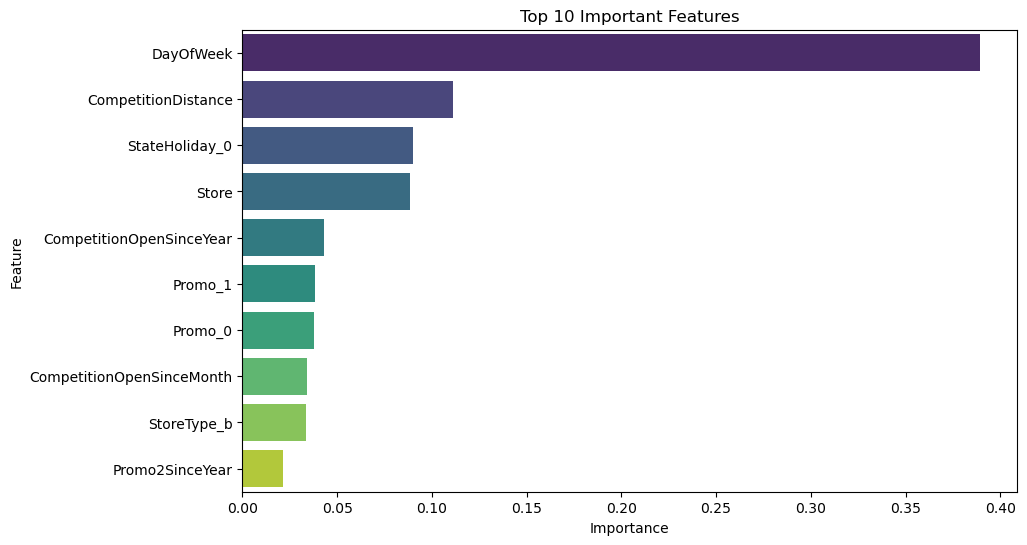

In [25]:
# Plot the top 10 important features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
sns.barplot(x="importance", y="feature", data=top_features, hue="feature", palette="viridis", legend=False)
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [26]:
# Confidence Interval
y_pred = trained_model.predict(X_val)
lower_ci, upper_ci = calculate_confidence_interval(y_pred)
print(f"95% Confidence Interval: ({lower_ci}, {upper_ci})")

95% Confidence Interval: ([5763.46280487], [5779.89078509])


In [27]:
# Extract predictions from each individual tree in the forest
all_tree_preds = np.array([tree.predict(X_test) for tree in model.estimators_])

# Calculate the mean prediction and standard deviation
mean_preds = np.mean(all_tree_preds, axis=0)
std_preds = np.std(all_tree_preds, axis=0)

# Confidence Interval at 95%
lower_bound = mean_preds - 1.96 * std_preds  # Lower bound
upper_bound = mean_preds + 1.96 * std_preds  # Upper bound

# Print out the first few predictions and their intervals
for i in range(5):
    print(f"Prediction: {mean_preds[i]:.2f}, 95% Confidence Interval: [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")

Prediction: 4422.52, 95% Confidence Interval: [3638.36, 5206.68]
Prediction: 7525.03, 95% Confidence Interval: [6589.05, 8461.02]
Prediction: 9405.66, 95% Confidence Interval: [7944.84, 10866.49]
Prediction: 7706.62, 95% Confidence Interval: [6681.31, 8731.93]
Prediction: 7730.98, 95% Confidence Interval: [6797.98, 8663.99]


In [28]:
# Serialize the model
model_path='../data'
model_filename = serialize_model(trained_model, model_path)
print(f"The ML Model serialized and saved as: {model_filename}")

The ML Model serialized and saved as: model_30-09-2024-18-53-47-856822.pkl
